In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
path = "C:/ProgramData/Anaconda3/DataSets/sentiment labelled sentences/sentiment labelled sentences/amazon_cells_labelled.txt"
raw_data = pd.read_csv(path, sep = '\t', header=None)
raw_data.columns = ['Review', 'Rating']

In [35]:
raw_data.head(5)

,Review,Rating,good,must have,great,perfect,love,happy,positive,good quality,...,impressed,bad,waste,lame,wasted,broken,wrong,negative,missing,confusing
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
#start by looking for positive reviews, then find negatives reviews,
#then compare output Rating to that of the given rating in the dataset.

keywords_positive = ['good','must have', 'great', 'perfect', 'love', 'happy', 'positive',
                    'good quality', 'highly', 'impressed']

for key in keywords_positive:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    raw_data[str(key)] = raw_data.Review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [34]:
keywords_negative = ['bad','waste','lame','wasted','broken',
                    'wrong','negative','missing','confusing']

for key in keywords_negative:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    raw_data[str(key)] = raw_data.Review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

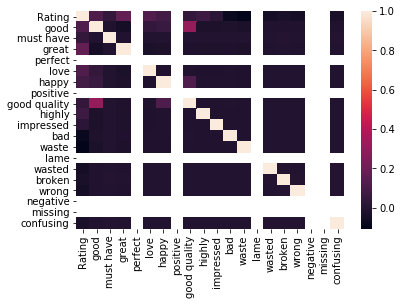

In [37]:
sns.heatmap(raw_data.corr())

In [38]:
data = raw_data[keywords_positive + keywords_negative]
target = raw_data['Rating']

In [39]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 411
